## Solutions

In [6]:
from quantecon import Kalman
from quantecon import LinearStateSpace
from scipy.stats import norm

### Exercise 1

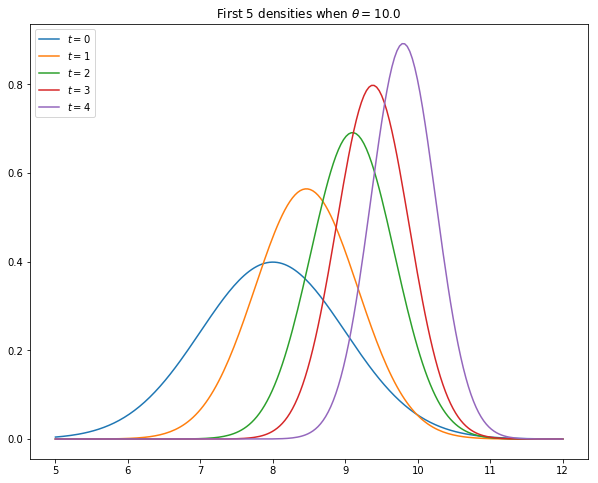

In [7]:
# == parameters == #
θ = 10  # Constant value of state x_t
A, C, G, H = 1, 0, 1, 1
ss = LinearStateSpace(A, C, G, H, mu_0=θ)

# == set prior, initialize kalman filter == #
x_hat_0, Σ_0 = 8, 1
kalman = Kalman(ss, x_hat_0, Σ_0)

# == draw observations of y from state space model == #
N = 5
x, y = ss.simulate(N)
y = y.flatten()

# == set up plot == #
fig, ax = plt.subplots(figsize=(10,8))
xgrid = np.linspace(θ - 5, θ + 2, 200)

for i in range(N):
    # == record the current predicted mean and variance == #
    m, v = [float(z) for z in (kalman.x_hat, kalman.Sigma)]
    # == plot, update filter == #
    ax.plot(xgrid, norm.pdf(xgrid, loc=m, scale=np.sqrt(v)), label=f'$t={i}$')
    kalman.update(y[i])

ax.set_title(f'First {N} densities when $\\theta = {θ:.1f}$')
ax.legend(loc='upper left')
plt.show()

### Exercise 2

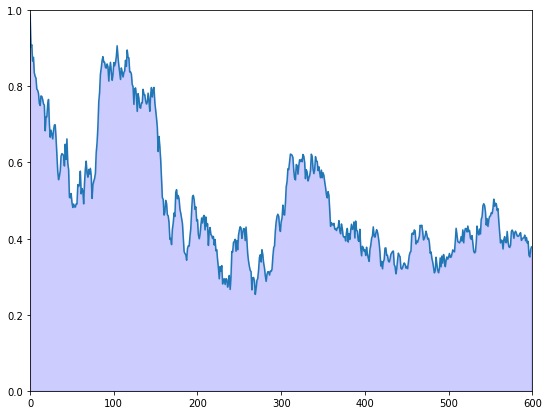

In [8]:
from scipy.integrate import quad

ϵ = 0.1
θ = 10  # Constant value of state x_t
A, C, G, H = 1, 0, 1, 1
ss = LinearStateSpace(A, C, G, H, mu_0=θ)

x_hat_0, Σ_0 = 8, 1
kalman = Kalman(ss, x_hat_0, Σ_0)

T = 600
z = np.empty(T)
x, y = ss.simulate(T)
y = y.flatten()

for t in range(T):
    # Record the current predicted mean and variance, and plot their densities
    m, v = [float(temp) for temp in (kalman.x_hat, kalman.Sigma)]

    f = lambda x: norm.pdf(x, loc=m, scale=np.sqrt(v))
    integral, error = quad(f, θ - ϵ, θ + ϵ)
    z[t] = 1 - integral

    kalman.update(y[t])

fig, ax = plt.subplots(figsize=(9, 7))
ax.set_ylim(0, 1)
ax.set_xlim(0, T)
ax.plot(range(T), z)
ax.fill_between(range(T), np.zeros(T), z, color="blue", alpha=0.2)
plt.show()

### Exercise 3

Eigenvalues of A:
[ 0.9+0.j -0.1+0.j]
Stationary prediction error variance:
[[0.40329108 0.1050718 ]
 [0.1050718  0.41061709]]


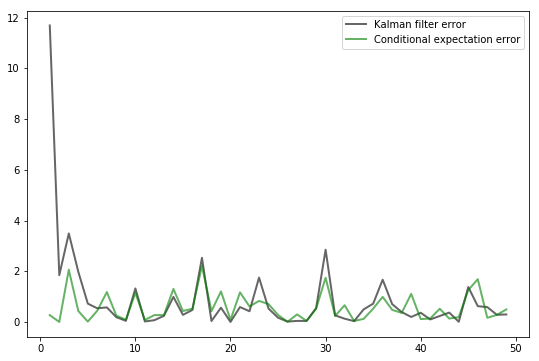

In [9]:
from numpy.random import multivariate_normal
from scipy.linalg import eigvals


# === Define A, C, G, H === #
G = np.identity(2)
H = np.sqrt(0.5) * np.identity(2)

A = [[0.5, 0.4],
     [0.6, 0.3]]
C = np.sqrt(0.3) * np.identity(2)

# === Set up state space mode, initial value x_0 set to zero === #
ss = LinearStateSpace(A, C, G, H, mu_0 = np.zeros(2))

# === Define the prior density === #
Σ = [[0.9, 0.3],
     [0.3, 0.9]]
Σ = np.array(Σ)
x_hat = np.array([8, 8])

# === Initialize the Kalman filter === #
kn = Kalman(ss, x_hat, Σ)

# == Print eigenvalues of A == #
print("Eigenvalues of A:")
print(eigvals(A))

# == Print stationary Σ == #
S, K = kn.stationary_values()
print("Stationary prediction error variance:")
print(S)

# === Generate the plot === #
T = 50
x, y = ss.simulate(T)

e1 = np.empty(T-1)
e2 = np.empty(T-1)

for t in range(1, T):
    kn.update(y[:,t])
    e1[t-1] = np.sum((x[:, t] - kn.x_hat.flatten())**2)
    e2[t-1] = np.sum((x[:, t] - A @ x[:, t-1])**2)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(1, T), e1, 'k-', lw=2, alpha=0.6, label='Kalman filter error')
ax.plot(range(1, T), e2, 'g-', lw=2, alpha=0.6, label='Conditional expectation error')
ax.legend()
plt.show()

**Footnotes**

<p><a id=f1 href=#f1-link><strong>[1]</strong></a> See, for example, page 93 of [[Bis06]](zreferences.ipynb#bishop2006). To get from his expressions to the ones used above, you will also need to apply the [Woodbury matrix identity](https://en.wikipedia.org/wiki/Woodbury_matrix_identity).